In [1]:
# 有分布未知的相互独立的变量 X，Y，讨论 X 与 XY 的 Pearson 系数
# ESMM 建模 X = P(c=1|x), Y = P(r=1|x,c=1), XY = P(c=1,r=1|x)

In [2]:
import numpy as np
import random

In [3]:
def gen_samples(dims=10):
    samples = []
    for i in range(dims-1):
        agg = sum(samples)
        samples.append(random.random()*(1-agg))
    samples.append(1-sum(samples))
    return samples

def gen_samples_v2(dims=10):
    samples = [random.random() for i in range(dims)]
    return np.array(list((map(lambda x : x/sum(samples), samples))))

def gen_samples_v3(dims=10):
    samples = [random.random() for i in range(dims)]
    return np.array(samples)

In [29]:
def distribute(search=100):
    dis = []
    for i in range(search):
        x, y = gen_samples_v3(), gen_samples_v3()
        cor_xy = np.corrcoef(x*y,x)
        dis.append(cor_xy[0, 1])
    return dis
        
def distribute_v2(threshold, search=100000):
    for i in range(search):
        x, y = gen_samples_v3(), gen_samples_v3()
        cor_xy = np.corrcoef(x*y,x)
        if abs(cor_xy[0,1]) < threshold:
            return x, y, cor_xy
        else:
            continue

In [6]:
import matplotlib.pyplot as plt

In [33]:
print(distribute_v2(0.001))

(array([ 0.94376503,  0.66607749,  0.46767798,  0.35416385,  0.25635601,
        0.6599729 ,  0.4025737 ,  0.11586734,  0.30856679,  0.5077323 ]), array([ 0.08133064,  0.13052527,  0.53388191,  0.86136273,  0.9765672 ,
        0.70477469,  0.26428628,  0.24918802,  0.79297894,  0.07893022]), array([[  1.00000000e+00,   6.01102449e-04],
       [  6.01102449e-04,   1.00000000e+00]]))


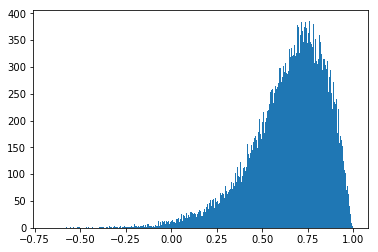

In [36]:
plt.hist(distribute(100000), bins=1000)
plt.show()

In [46]:
# cov(XY, X) = E(XY*X) - E(XY)E(X) = E(X*X)E(Y) - E(X)E(X)E(Y) = D(X)E(Y) = 0, 得 D(X) = 0
# 即：当 X 的方差为 0 时，X 与 XY 不相关，但推荐系统中显然 D(X) != 0
x = np.array([0.6] * 10)
y = gen_samples_v3()
print(np.cov(x*y,x), np.corrcoef(x*y,x))

[[  3.92249474e-02  -1.23259516e-32]
 [ -1.23259516e-32   1.36955018e-32]] [[  1.00000000e+00  -5.31802408e-16]
 [ -5.31802408e-16   1.00000000e+00]]


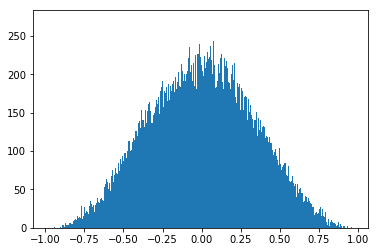

In [48]:
# 均匀分布下 X 与 Y 的相关性分布如下 
def distribute_v3(search=100):
    dis = []
    for i in range(search):
        x, y = gen_samples_v3(), gen_samples_v3()
        cor_xy = np.corrcoef(y,x)
        dis.append(cor_xy[0, 1])
    return dis
plt.hist(distribute_v3(100000), bins=1000)
plt.show()

In [49]:
# 假设真实预估符合正态分布，随机生成的两个正态分布 X, Y 
# X 期望 e1, 方差 d1；X 期望 e2, 方差 d2；
# cor(x, y) = E()


In [ ]:
# conflict: ctr cvr 条件独立，则一定不相关，高 ctr 倾向高 cvr ？